In [9]:
import os
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
from pycocotools.coco import COCO
from PIL import Image

In [10]:
DATASET_PATH = '../data'
JSON_NAME = 'cv_train_1.json'

json_path = os.path.join(DATASET_PATH, JSON_NAME)
coco = COCO(json_path)

loading annotations into memory...
Done (t=3.16s)
creating index...
index created!


Image:	(512, 512, 3)
Image Size: (height)-512, (width)-512


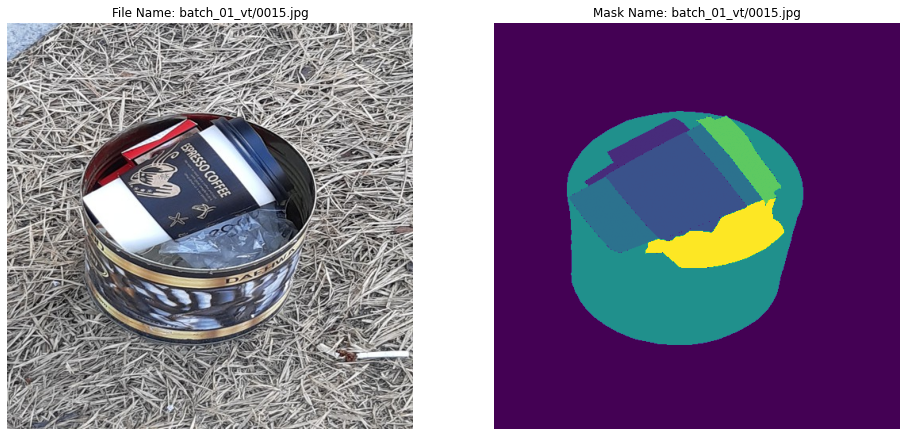

In [27]:
SAMPLE_IDX = 10

image_id = coco.getImgIds()[SAMPLE_IDX]
image_infos = coco.loadImgs(image_id)[0]
image_path = os.path.join(DATASET_PATH, image_infos['file_name'])
image = np.array(Image.open(image_path))

print('Image:\t{}'.format(image.shape))

ann_id = coco.getAnnIds(imgIds=image_infos['id'])
anns = coco.loadAnns(ann_id)
masks = np.zeros((image_infos['height'], image_infos['width']))
for ann in anns:
    category_id = int(ann['category_id'])
    masks[coco.annToMask(ann) == 1] = category_id

print(f'Image Size: (height)-{image_infos["height"]}, (width)-{image_infos["width"]}')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 15))
axs[0].imshow(image)
axs[0].set_title('File Name: {}'.format(image_infos['file_name']))
axs[0].axis('off')
axs[1].imshow(masks)
axs[1].set_title('Mask Name: {}'.format(image_infos['file_name']))
axs[1].axis('off')
plt.show()

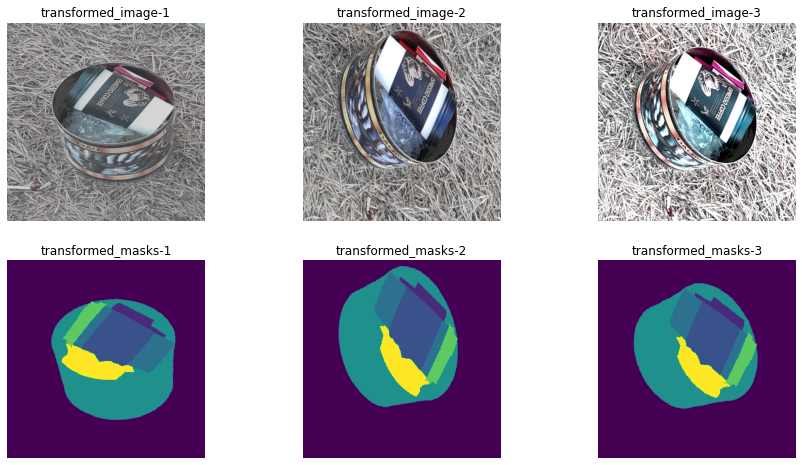

In [32]:
transform = A.Compose([
    # A.Rotate(p=0.5, limit=90, border_mode=cv2.BORDER_CONSTANT),
    A.Rotate(p=0.5, limit=90),
    A.RandomResizedCrop(height=512, width=512, scale=(0.5, 1.0), p=1),
    A.Flip(p=0.5),
    A.ColorJitter(0.5, 0.5, 0.5, 0.25, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.15, p=0.5),
    A.GaussNoise(p=0.2),
])

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 8))
for i in range(3):
    transformed = transform(image=image, mask=masks)
    transformed_image = transformed['image']
    transformed_masks = transformed['mask']

    axs[0][i].imshow(transformed_image)
    axs[0][i].set_title(f'transformed_image-{i+1}')
    axs[0][i].axis('off')
    axs[1][i].imshow(transformed_masks)
    axs[1][i].set_title(f'transformed_masks-{i+1}')
    axs[1][i].axis('off')
plt.show()